<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/decisiontree_demo_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#for the following statement to compile successfully, you need the scikit-learn package. 

from sklearn.datasets import load_iris #for loading iris dataset
from sklearn import tree #decision tree from scikit learn 

np.random.seed(1000) #for reproducibility
iris = load_iris()
#check the shape of iris data features
print('iris data shape:', iris.data.shape)
A = iris.data
#check the shape of iris target labels
print('iris target shape:', iris.target.shape)
#We can print first 5 samples of iris data and check 
print('Features of first five samples of iris data:')
print(A[:,])

iris data shape: (150, 4)
iris target shape: (150,)
Features of first five samples of iris data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 

In [ ]:
#How many labels does iris data have? 
#print the unique classes
print('unique classes: ',np.unique(iris.target))
n = iris.data.shape[0] #Number of data points or samples 
d = iris.data.shape[1] #Dimension of data points

unique classes:  [0 1 2]


In [ ]:
#In the following code, we create a nx1 vector of target labels 
y = 1.0*np.ones([A.shape[0],1])
for i in range(iris.target.shape[0]):
    if iris.target[i] == 0:
        y[i] = 1
    else:
        y[i] = -1

In [ ]:
#Create an index array 
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices 
#print('shuffled indices of samples:')
#print(indexarr)

In [ ]:
#Use the samples corresponding to first 80% of indexarr for training 
num_train = int(0.8*n)
#Use the remaining 20% samples for testing 
num_test = n-num_train
print('num_train: ',num_train, 'num_test: ', num_test)

num_train:  120 num_test:  30


In [ ]:
#Use the first 80% of indexarr to create the train data features and train labels 
train_features = A[indexarr[0:num_train]]
train_label = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_features.shape)
print('shape of train data labels')
print(train_label.shape)

shape of train data features:
(120, 4)
shape of train data labels
(120, 1)


In [ ]:
#Use remaining 20% of indexarr to create the test data and test labels  
test_features = A[indexarr[num_train:n]]
test_label = y[indexarr[num_train:n]]
print('shape of test data features:')
print(test_features.shape)
print('shape of test data labels')
print(test_label.shape)

shape of test data features:
(30, 4)
shape of test data labels
(30, 1)


In [ ]:
#create a decision tree classifier with 'entropy' as criterion
clf = tree.DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 163.07999999999998, 'X[3] <= 0.8\nentropy = 0.891\nsamples = 120\nvalue = [83, 37]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 83\nvalue = [83, 0]')]

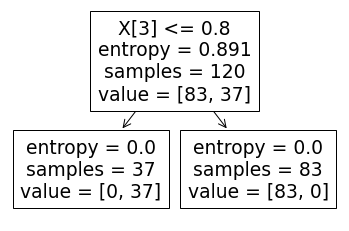

In [ ]:
#train using decision tree classifier and plot the resultant decision tree
tree.plot_tree(clf.fit(train_features, train_label)) 

In [ ]:
#Get the trained model in clf_model
clf_model = clf.fit(train_features,train_label)
#We will now use the trained model for predition on the test data set
predicted_labels = clf_model.predict(test_features)

In [ ]:
#reshaping predicted_labels so that it is of the same shape as test_label
predicted_labels = np.reshape(predicted_labels.data,(num_test,1))
#If you wish to see how predicted_labels and test_label look, you can print them and check
#print(predicted_labels)
#print(test_label)

In [ ]:
#compute test set error and test set accuracy 
test_error = np.sum(0.5*np.abs(predicted_labels-test_label))/len(test_label)*100.0#Try to understand this equation
test_accuracy = 100.0-test_error 
#print the test set accuracy 
print('test set accuracy:', test_accuracy)

test set accuracy: 100.0


In [ ]:
#We can also use the trained model clf_model to predict the train set 
predicted_train_labels = clf_model.predict(train_features)
#reshaping predicted_train_labels so that it is of the same shape as train_label
predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
#compute train set error and train set accuracy 
train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
train_accuracy = 100.0-train_error 
#print the test set accuracy 
print('train set accuracy:', train_accuracy)

train set accuracy: 100.0


In [ ]:
#Note that Iris data has three labels 0, 1 and 2. In the code above, 
#we have considered label 0 as class 1 and other two labels as class -1. 

#Exercise 1: 
#Now, modify the code so that label 1 is considered as class 1 and 
#other labels are considered as class -1.
#Consider the same setup as used in the code above,
#where we take first 80% as train data, and remaining 20% as test data 
#Train the decision tree using only the train features and labels. 
#Plot the resultant tree. 
#Find the test set accuracy and train set accuracy and report them.

#Exercise 2: 
#Modify the code so that label 2 is considered as class 1 and 
#other labels are considered as class -1. 
#Consider the same setup as used in the code above,
#where we take first 80% as train data, and remaining 20% as test data 
#Train the decision tree using only the train features and labels. 
#Plot the resultant tree 
#Find the test accuracy and train accuracy and report them.

